## How well do jobs and skills pay for Data Analysts?
### Methology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Loading Data
df = pd.read_csv('data_jobs.csv')

In [77]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [78]:
df_salaries = df.copy().dropna(subset="salary_year_avg")

In [79]:
job_titles = df_salaries['job_title_short'].value_counts().index[:6].tolist()

df_top_jobs = df_salaries[df_salaries['job_title_short'].isin(job_titles)]

job_order = df_top_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

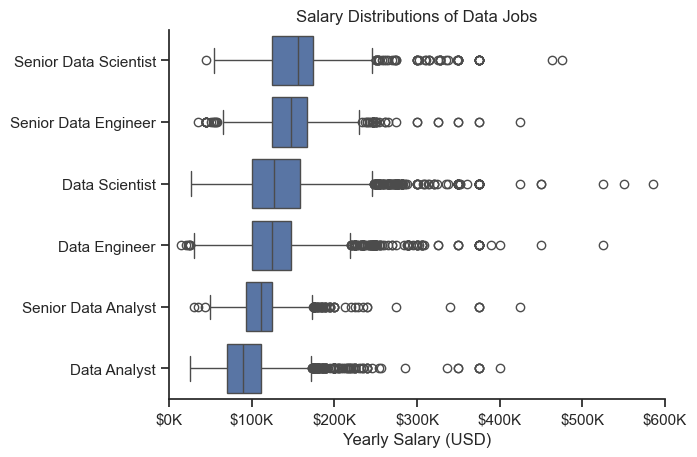

In [81]:
sns.set_theme(style='ticks')
sns.boxplot(data=df_top_jobs, x='salary_year_avg', y='job_title_short', order=job_order)
sns.despine()

plt.title('Salary Distributions of Data Jobs')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [84]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

df_DA = df_DA.dropna(subset=['salary_year_avg'])

df_DA = df_DA.explode('job_skills')

df_DA[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
785187,111175.0,sql
785187,111175.0,python
785187,111175.0,r
785187,111175.0,looker


In [97]:
top_paid_skills = df_DA.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="median", ascending=False).head(10)
top_paid_skills

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
terraform,3,163782.0
gitlab,7,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


In [116]:
most_requested_skills = df_DA.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count", ascending=False).head(10).sort_values("median", ascending=False)
most_requested_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


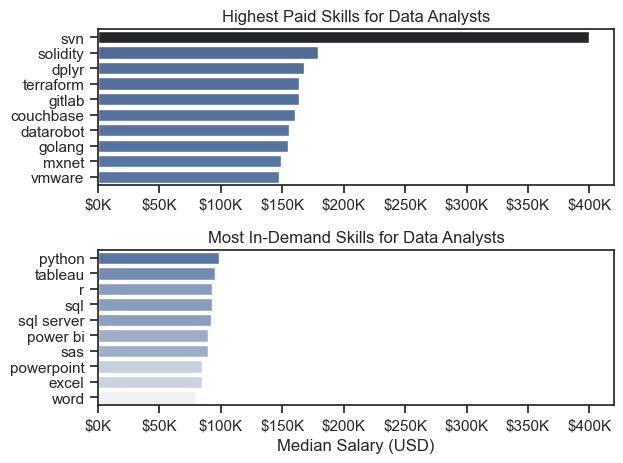

In [144]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
sns.barplot(data=top_paid_skills, x="median", y="job_skills", hue='median', palette='dark:b_r', ax=ax[0], legend=False)
ax[0].set_title('Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=most_requested_skills, x="median", y="job_skills", hue='median', palette='light:b', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()